# **WEEK 7 - FILTER SPASIAL**
- Naresh Pratista
- 2141720057
- TI-3H

## **Praktikum Filter**

### **1. Buatlah fungsi konvolus menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa menggunakan library atau metode konvolusi dari OpenCV.**


### **2. Berikut merupakan langkah-langkah yang dapat dilakukan:**

a. Buat notebook baru pada google colab, dan beri nama Week7.ipynb. Simpan salinan pada akun github seperti pada modul seebelumnya

b. Import beberapa library yang dibutuhkan

In [1]:
# import library

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

c. Buatlah fungsi konvolusi. Catatan: parameter yang digunakan boleh dimodifikasi. Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan padding.

Langkah-langkah membuat konvolusi tanpa library
1. Citra masukan,
2. Kernel berupa matriks untuk memfilter citra,
3. Nilai stride/besarnya pergeseran untuk setiap konvolusi,
4. Nilai pad yang akan ditambahkan pada citra

In [28]:
def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  return new_image


D. Load citra yang akan di proses dan ubah menjadi citra keabuan

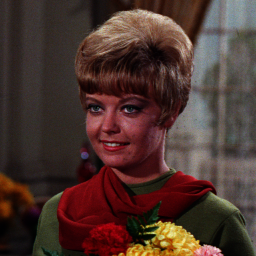

In [29]:
img_m = cv.imread('/content/drive/MyDrive/Colab Notebooks/week7/female.tiff')
img_s = cv.resize(img_m, (0,0), fx=0.5, fy=0.5)
img_gray = cv.cvtColor(img_m, cv.COLOR_BGR2GRAY)

cv2_imshow(img_m)

E. Tentukan kernel yang akan digunakan, contohnya kernel untuk filter sharpening sebagai berikut

In [30]:
kernel_sharpen = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])

F. Memanggil fungsi konvulsi yang telah dibuat sebelumnya dan menampilkan hasil konvolusinya :

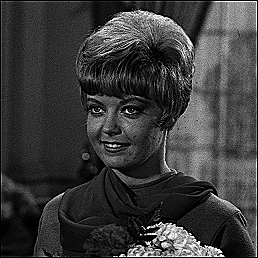

In [31]:
result = convolution2d(img_gray,kernel_sharpen,1,2)
cv2_imshow(result)

### **3. Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter berikut:**

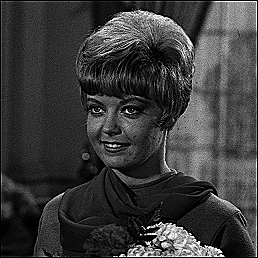

In [32]:
# Operasi Sharpen

kernel_sharpen = np.array([[0, -1, 0],
                          [-1, 5, -1],
                          [0, -1, 0]])
cv2_imshow(convolution2d(img_gray, kernel_sharpen, 1, 2))

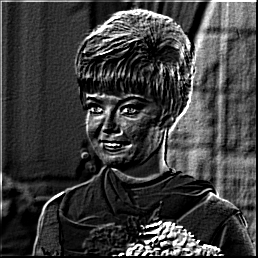

In [33]:
# Operasi EMBOSS

kernel_emboss = np.array([[-2, -1, 0],
                          [-1, 1, 1],
                          [0, 1, 2]])
cv2_imshow(convolution2d(img_gray, kernel_emboss, 1, 2))

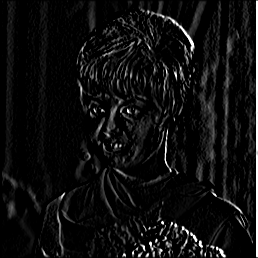

In [34]:
# Operasi Left Sobel Edge Detection

kernel_sobel = np.array([[1, 0, -1],
                          [2, 0, -2],
                          [1, 0, -1]])
cv2_imshow(convolution2d(img_gray, kernel_sobel, 1, 2))

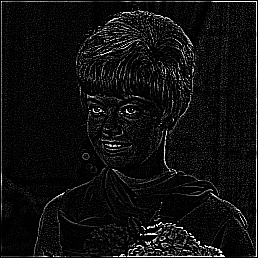

In [35]:
# Operasi Canny Edge Detection

kernel_canny = np.array([[-1, -1, -1],
                          [-1, 8, -1],
                          [-1, -1, -1]])
cv2_imshow(convolution2d(img_gray, kernel_canny, 1, 2))

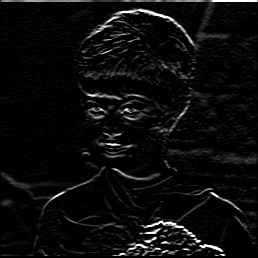

In [36]:
# Prewitt Edge Detection
kernel_prewitt= np.array([[-1, -1, -1],
                             [0, 0, 0],
                             [1, 1, 1]])
cv2_imshow(convolution2d(img_gray, kernel_prewitt, 1, 2))

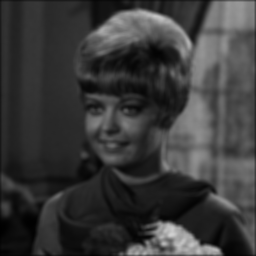

In [37]:
# 5x5 Gaussian Blur

kernel_size = 5
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
kernel_gauss= gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, kernel_gauss, 1, 2))

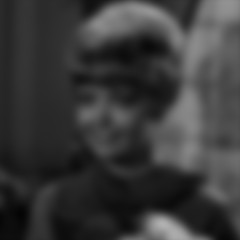

In [38]:
# 21x21 Gaussian Blur

kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
kernel_gauss= gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, kernel_gauss, 1, 2))

## **Tugas**

Diketahui dataset KTP dengan kondisi citra yang berbeda. Lakukan perbaikan melalui implementasi teknik filterisasi dan detection setiap citra. Terapkan juga histogram equalization dan operasi aritmatika sebagai Teknik pendukung perbaikan citra KTP.

In [51]:
# Import Library

import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [55]:
# Path Folder
folder_path = "/content/drive/MyDrive/Colab Notebooks/week7/KTP_More"

In [56]:
# Daftar Citra

ktp_files = [file for file in os.listdir(folder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

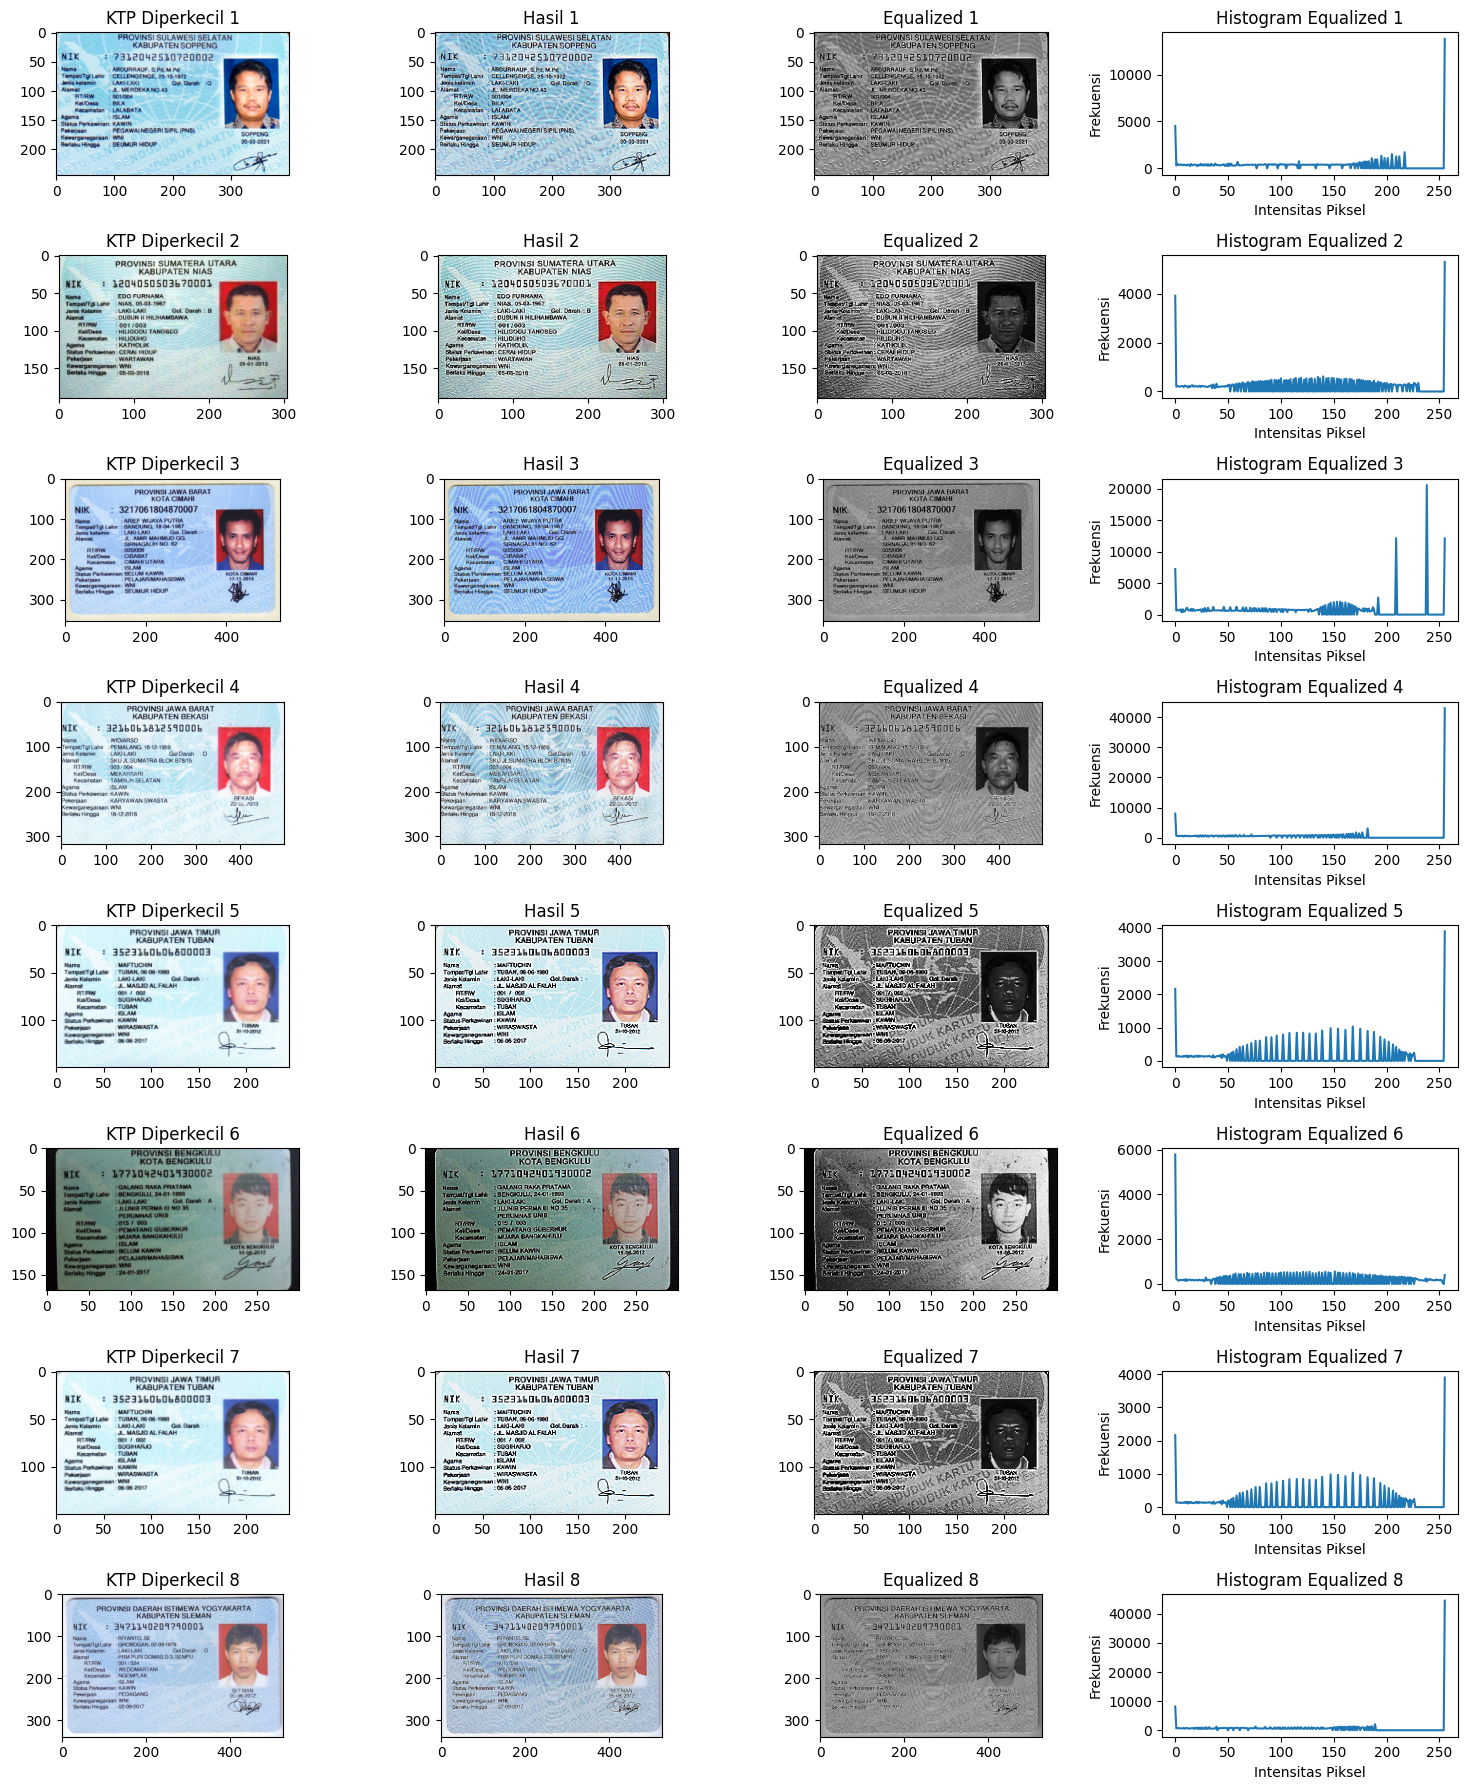

In [57]:
# Fungsi untuk penyesuaian kecerahan
def Brightness(image, value):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v = cv2.add(v, value)
    v = np.clip(v, 0, 255)
    hsv = cv2.merge((h, s, v))
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

# Kernel untuk mengasah gambar
kernel_sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])


# Buat grid untuk menampilkan gambar
num_rows = len(ktp_files)
num_cols = 4
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 18))

# Iterasi melalui gambar-gambar KTP
for i, ktp_file in enumerate(ktp_files):
    ktp_path = os.path.join(folder_path, ktp_file)
    ktp_image = cv2.imread(ktp_path)

    # Ubah ukuran gambar KTP
    ktp_image_resized = cv2.resize(ktp_image, (0, 0), fx=0.5, fy=0.5)

    # Terapkan penyesuaian Brightness
    brightness_adjusted = Brightness(ktp_image_resized, -10)

    # Terapkan Sharpen
    result = cv2.filter2D(brightness_adjusted, -1, kernel_sharpen)

    # Lakukan histogram equalization
    result_gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
    result_equalized = cv2.equalizeHist(result_gray)
    result_equalized_color = cv2.cvtColor(result_equalized, cv2.COLOR_GRAY2BGR)

    # Tampilkan gambar asli dengan label
    axs[i, 0].imshow(cv2.cvtColor(ktp_image_resized, cv2.COLOR_BGR2RGB))
    axs[i, 0].set_title(f'KTP Diperkecil {i+1}')

    # Tampilkan gambar yang telah diolah dengan label
    axs[i, 1].imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB,))
    axs[i, 1].set_title(f'Hasil {i+1}')

    # Tampilkan gambar hasil equalisasi dengan label
    axs[i, 2].imshow(cv2.cvtColor(result_equalized_color, cv2.COLOR_BGR2RGB))
    axs[i, 2].set_title(f'Equalized {i+1}')

    # Hitung histogram gambar hasil equalisasi
    hist_equalized = cv2.calcHist([result_equalized], [0], None, [256], [0, 256])

    # Tampilkan histogram pada kolom ke-4 dengan label
    axs[i, 3].plot(hist_equalized)
    axs[i, 3].set_title(f'Histogram Equalized {i+1}')
    axs[i, 3].set_xlabel('Intensitas Piksel')
    axs[i, 3].set_ylabel('Frekuensi')

# Tampilkan hasil keseluruhan
plt.tight_layout()
plt.show()